In [21]:
import requests
import json
import pandas as pd

In [22]:
# events_df = pd.DataFrame(columns=['id', 'name', 'description', 'start', 'end', 'location', 'category', 'url', 'image', 'price', 'currency', 'status', 'created', 'modified', 'online', 'venue', 'organizer', 'tickets', 'capacity', 'attendees', 'waitlist', 'shareable', 'invite_only', 'password', 'capacity_is_custom', 'show_remaining', 'remaining', 'source', 'is_free', 'logo', 'logo_id', 'category_id', 'subcategory_id', 'format_id', 'resource_uri', 'is_externally_ticketed', 'logo_url', 'logo_aspect_ratio', 'organizer_id', 'venue_id', 'format', 'subcategory', 'category_name', 'venue_name', 'venue_latitude', 'venue_longitude', 'organizer_name', 'organizer_description', 'organizer_long_description', 'organizer_logo', 'organizer_url', 'organizer_twitter', 'organizer_facebook', 'organizer_num_past_events', 'organizer_num_future_events', 'organizer_num_followers', 'organizer_num_following', 'organizer_num_upcoming_events', 'organizer_num_published_events', 'organizer_num_tickets', 'organizer_num_public_events', 'organizer_num_private_events', 'organizer_num_internal_events', 'organizer_num_external_events', 'organizer_num_internal_live_events', 'organizer_num_internal_draft_events', 'organizer_num_internal_published_events', 'organizer_num_internal_past_events', 'organizer_num_internal_future_events', 'organizer_num_internal_upcoming_events', 'organizer_num_internal_public_events', 'organizer_num_internal_private_events', 'organizer_num_internal_internal_events', 'organizer_num_internal_external_events', 'organizer_num_internal_internal_live_events', 'organizer_num_internal_internal_draft_events', 'organizer_num_internal_internal_published_events', 'organizer_num_internal_internal_past_events', 'organizer_num_internal_internal_future_events', 'organizer_num_internal_internal_upcoming_events', 'organizer_num_internal_internal_public_events', 'organizer_num_internal_internal_private_events', 'organizer_num_internal_internal_internal_events', 'organizer_num_internal_internal_external_events', 'organizer_num_internal_internal_internal_live_events', 'organizer_num_internal_internal_internal_draft_events', 'organizer_num_internal_internal_internal_published_events', 'organizer_num_internal_internal_internal_past_events', 'organizer_num_internal_internal_internal)

In [23]:
API_KEY = 'KraVYTRQzL31I7TleeO3d8AwQyMkaWwA'
def read_spotify():
    try: 
        with open("spotify_data.json","r") as f:
            return json.load(f)
    except FileNotFoundError:
        print("Error: Sotify data file not found.")

"""
def get_concerts_based_on_artist(artist_name, city="New York"):
    url = f"https://app.ticketmaster.com/discovery/v2/events.json"
    params ={
        'apikey': API_KEY,
        'keyword': artist_name,  # Artist name
        'city': city,
        'size': 5
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        events = data.get('_embedded', {}).get('events', [])

        if events:
            print(f"Concerts for {artist_name} in {city}:")
            for event in events:
                event_name = event['name']
                event_date = event['dates']['start']['localDate']
                venue_name = event['_embedded']['venues'][0]['name']
                venue_location = event['_embedded']['venues'][0]['city']['name']
                print(f"{event_name} - {event_date} at {venue_name}, {venue_location}")
        else:
            print(f"No concerts found for {artist_name} in {city}.")
    else:
        print("Error fetching data from Ticketmaster API.")

artist_name = "Kenzie Cait"
get_concerts_based_on_artist(artist_name)
"""

'\ndef get_concerts_based_on_artist(artist_name, city="New York"):\n    url = f"https://app.ticketmaster.com/discovery/v2/events.json"\n    params ={\n        \'apikey\': API_KEY,\n        \'keyword\': artist_name,  # Artist name\n        \'city\': city,\n        \'size\': 5\n    }\n\n    response = requests.get(url, params=params)\n    if response.status_code == 200:\n        data = response.json()\n        events = data.get(\'_embedded\', {}).get(\'events\', [])\n\n        if events:\n            print(f"Concerts for {artist_name} in {city}:")\n            for event in events:\n                event_name = event[\'name\']\n                event_date = event[\'dates\'][\'start\'][\'localDate\']\n                venue_name = event[\'_embedded\'][\'venues\'][0][\'name\']\n                venue_location = event[\'_embedded\'][\'venues\'][0][\'city\'][\'name\']\n                print(f"{event_name} - {event_date} at {venue_name}, {venue_location}")\n        else:\n            print(f"No c

In [24]:
def get_concerts(artists, genre, city="New York"):
    url = f"https://app.ticketmaster.com/discovery/v2/events.json"

    search_terms = artists+[genre] if genre else artists

    for term in search_terms:
        params = {
            'apikey': API_KEY,
            'keyword': term,
            'city': city,
            'classificationName': 'music',
            'size': 10
        }

        response = requests.get(url, params=params)
        if response.status_code==200:
            data = response.json()
            events = data.get('_embedded', {}).get('events', [])
            if events:
                # Create a pandas dataframe
                events_df = pd.DataFrame(columns = ['event_name', 'event_date', 'venue_name', 'venue_location', 'longitude', 'latitude'])
                
                print(f"\nConcerts in {city} for {term}:")
                for event in events:
                    event_name = event['name']
                    event_date = event['dates']['start']['localDate']
                    venue_name = event['_embedded']['venues'][0]['city']['name']
                    venue_location = event['_embedded']['venues'][0]['city']['name']
                    longitude = event['_embedded']['venues'][0]['location']['longitude']
                    latitude = event['_embedded']['venues'][0]['location']['latitude']
                    print(f"\n{event_name} \n{event_date} at {venue_name},{venue_location}")
                    print(f"Longitude: {longitude}, Latitude: {latitude}")

                    # Write into a pandas dataframe -> csv file
                    # insert name, date, venue name, venue location, longitude, latitude
                    events_df.loc[len(events_df)] = [event_name, event_date, venue_name, venue_location, longitude, latitude]
                    
                events_df.to_csv('events.csv')
                    
        else:
            print("No concerts found :(")
            events_df.to_csv('events.csv')

spotify_data = read_spotify()
if spotify_data:
    get_concerts(spotify_data["top_artists"], spotify_data["top_genre"])




Concerts in New York for Gracie Abrams:

Gracie Abrams: The Secret Of Us Deluxe Tour with Role Model 
2025-07-28 at New York,New York
Longitude: -73.99160060, Latitude: 40.74970620

Gracie Abrams: The Secret Of Us Deluxe Tour with Role Model 
2025-07-29 at New York,New York
Longitude: -73.99160060, Latitude: 40.74970620
No concerts found :(

Concerts in New York for pop:

Um, Jennifer?, Pop Music Fever Dream 
2025-04-25 at New York,New York
Longitude: -73.9840245, Latitude: 40.7258559

Yacht Rock Revue - Yacht Rock Forever Tour 
2025-08-01 at New York,New York
Longitude: -74.001798, Latitude: 40.7056185

Yacht Rock Revue - Yacht Rock Forever Tour 
2025-08-01 at New York,New York
Longitude: -74.002899000, Latitude: 40.708801000

The Rock Orchestra By Candlelight 
2025-12-09 at New York,New York
Longitude: -73.98067300, Latitude: 40.77992500

Dash Rip Rock | Eric Ambel 
2025-05-16 at New York,New York
Longitude: -73.986080, Latitude: 40.722974

Seamstress • Samsara • Moderate Rock • Som

In [25]:
df = pd.read_csv('events.csv')
# drop first column
df = df.drop(df.columns[0], axis=1)
df

,event_name,event_date,venue_name,venue_location,longitude,latitude
0,"Um, Jennifer?, Pop Music Fever Dream",2025-04-25,New York,New York,-73.984025,40.725856
1,Yacht Rock Revue - Yacht Rock Forever Tour,2025-08-01,New York,New York,-74.001798,40.705618
2,Yacht Rock Revue - Yacht Rock Forever Tour,2025-08-01,New York,New York,-74.002899,40.708801
3,The Rock Orchestra By Candlelight,2025-12-09,New York,New York,-73.980673,40.779925
4,Dash Rip Rock | Eric Ambel,2025-05-16,New York,New York,-73.986080,40.722974
5,Seamstress • Samsara • Moderate Rock • Somethi...,2025-08-02,New York,New York,-73.991673,40.725700
6,School of Rock Manhattan - End of Season,2025-06-08,New York,New York,-73.990377,40.744250
7,School of Rock Manhattan - End of Season,2025-06-14,New York,New York,-73.990377,40.744250
8,School of Rock Manhattan - End of Season,2025-06-15,New York,New York,-73.990377,40.744250
9,School of Rock New York: Mid Season Show,2025-04-26,New York,New York,-73.982927,40.745847


In [26]:
%pip install -U googlemaps

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from datetime import datetime
import googlemaps
from dotenv import load_dotenv
import os

load_dotenv()

GMAPS_API_KEY = os.getenv('GMAPS_KEY') # Ensure you have set this in your .env file or replace with your actual API key

gmaps = googlemaps.Client(key=GMAPS_API_KEY)

# Class for using Google 
# Pick an event from the dataframe... (frontend to pick later on)
    # calculate distance metrics via matrix of  to EACH airbnb's longitude and latitude (assume passing rows of dataframe to this function)
def calculate_distance_metrics(events_df, airbnb_df):
    event_location = (events_df['latitude'], events_df['longitude']) # (lat, long) of the event

    # Create a list to store distance metrics
    distance_metrics = [] #INSTEAD: directly append to airbnb_df to save time and space
    

    for index, airbnb in airbnb_df.iterrows():
        airbnb_location = (airbnb['latitude'], airbnb['longitude']) # (lat, long) of the airbnb

        # Calculate distance and duration
        result = gmaps.distance_matrix(event_location, airbnb_location, mode='driving', departure_time=datetime.now())

        if result['rows'][0]['elements'][0]['status'] == 'OK':
            distance = result['rows'][0]['elements'][0]['distance']['value'] / 1000  # Convert to kilometers
            duration = result['rows'][0]['elements'][0]['duration']['value'] / 60  # Convert to minutes
            distance_metrics.append((airbnb['id'], distance, duration))
        else:
            distance_metrics.append((airbnb['id'], None, None))

    return distance_metrics
    



In [28]:
import requests
import json
from typing import List, Dict, Any
import datetime

class GoogleRoutesMatrix:
    def __init__(self, api_key: str):
        """
        Initialize with your Google Maps API key
        """
        self.api_key = api_key
        # Correct endpoint URL that's now working
        self.base_url = "https://routes.googleapis.com/distanceMatrix/v2:computeRouteMatrix"
        
    def compute_route_matrix(
        self, 
        origins: List[Dict[str, float]], 
        destinations: List[Dict[str, float]],
        travel_mode: str = "DRIVE",
        routing_preference: str = "TRAFFIC_AWARE",
        units: str = "METRIC"
    ) -> List[Dict]:
        """
        Compute a route matrix between origins and destinations
        
        Parameters:
        - origins: List of locations as [{"latitude": lat, "longitude": lng}, ...]
        - destinations: List of locations as [{"latitude": lat, "longitude": lng}, ...]
        - travel_mode: "DRIVE", "WALK", "BICYCLE", "TWO_WHEELER"
        - routing_preference: "TRAFFIC_AWARE", "TRAFFIC_AWARE_OPTIMAL", "TRAFFIC_UNAWARE"
        - units: "METRIC" or "IMPERIAL"
        
        Returns:
        - List of route matrix elements
        """
        # Format origins and destinations with the correct structure
        formatted_origins = []
        for loc in origins:
            formatted_origins.append({
                "waypoint": {
                    "location": {
                        "latLng": {
                            "latitude": loc["latitude"],
                            "longitude": loc["longitude"]
                        }
                    }
                }
            })
        
        formatted_destinations = []
        for loc in destinations:
            formatted_destinations.append({
                "waypoint": {
                    "location": {
                        "latLng": {
                            "latitude": loc["latitude"],
                            "longitude": loc["longitude"]
                        }
                    }
                }
            })
        
        # Build the request payload
        payload = {
            "origins": formatted_origins,
            "destinations": formatted_destinations,
            "travelMode": travel_mode,
            "routingPreference": routing_preference,
            "units": units
        }
        
        # Set departure time to 5 minutes in the future to ensure it's valid
        future_time = datetime.datetime.now(datetime.timezone.utc) + datetime.timedelta(minutes=5)
        payload["departureTime"] = future_time.isoformat()
            
        # Headers required for the API
        headers = {
            "Content-Type": "application/json",
            "X-Goog-Api-Key": self.api_key,
            "X-Goog-FieldMask": "originIndex,destinationIndex,duration,distanceMeters,status"
        }
        
        # Make the API request
        response = requests.post(self.base_url, json=payload, headers=headers)
        
        # Handle the response
        if response.status_code == 200:
            # API returns a list, not an object with 'routeMatrixElement'
            return response.json()
        else:
            raise Exception(f"API request failed with status code {response.status_code}: {response.text}")
    
    def format_results(self, matrix_results: List[Dict]) -> List[Dict[str, Any]]:
        """
        Format the matrix results into a more readable format
        
        Parameters:
        - matrix_results: List of route matrix elements from the API
        
        Returns a list of dictionaries containing:
        - origin_index: Index of the origin
        - destination_index: Index of the destination
        - distance_meters: Distance in meters
        - distance_km: Distance in kilometers
        - duration_seconds: Duration in seconds
        - duration_minutes: Duration in minutes
        - status: Status of the route calculation
        """
        formatted_results = []
        
        # matrix_results is now a list, not a dictionary
        for route in matrix_results:
            # Extract duration in seconds from string like "7200s"
            duration_str = route.get("duration", "0s")
            duration_seconds = int(duration_str.rstrip("s")) if duration_str.endswith("s") else 0
            
            result = {
                "origin_index": route.get("originIndex"),
                "destination_index": route.get("destinationIndex"),
                "distance_meters": route.get("distanceMeters", 0),
                "distance_km": round(route.get("distanceMeters", 0) / 1000, 2),
                "duration_seconds": duration_seconds,
                "duration_minutes": round(duration_seconds / 60, 2),
                "status": "OK" if route.get("distanceMeters", 0) > 0 else "FAILED"
            }
            formatted_results.append(result)
            
        return formatted_results

In [29]:
# observe the data before calculating distances

# centroids_df = pd.read_csv('centroids.csv')
# centroids_df

# set of unique centroids and their corresponding longitude and latitude
centroids_df = pd.read_csv('final_airbnb_dataset.csv')
# drop all columns except for cluster_id, longitude, latitude
centroids_df = centroids_df[['cluster_id', 'centroid_longitude', 'centroid_latitude']].drop_duplicates()
# sort by cluster_id
centroids_df.sort_values(by='cluster_id', inplace=True)
# reset index
centroids_df.reset_index(drop=True, inplace=True)

print(centroids_df)



    cluster_id  centroid_longitude  centroid_latitude
0            0          -73.996868          40.660246
1            1          -73.971960          40.791366
2            2          -73.815801          40.740030
3            3          -73.920870          40.690257
4            4          -73.848937          40.820578
5            5          -73.995249          40.721423
6            6          -73.920123          40.757882
7            7          -73.955693          40.623915
8            8          -74.111543          40.612548
9            9          -73.762375          40.685070
10          10          -73.924641          40.848802
11          11          -73.952000          40.716088
12          12          -73.945467          40.811921
13          13          -73.954665          40.678160
14          14          -73.985633          40.753995
15          15          -73.954442          40.771559
16          16          -73.862280          40.874758
17          17          -73.

In [30]:
centroids_df.to_dict()

{'cluster_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19},
 'centroid_longitude': {0: -73.99686789392906,
  1: -73.97196021837362,
  2: -73.815800767956,
  3: -73.92086994242919,
  4: -73.84893743805434,
  5: -73.9952492104475,
  6: -73.92012332752982,
  7: -73.95569294976235,
  8: -74.11154260757391,
  9: -73.76237460283924,
  10: -73.924640999371,
  11: -73.9520004056764,
  12: -73.94546662834728,
  13: -73.95466467721297,
  14: -73.9856330633054,
  15: -73.95444233292501,
  16: -73.8622800956592,
  17: -73.87873083291242,
  18: -73.88107835916607,
  19: -73.78971714162185},
 'centroid_latitude': {0: 40.66024629154761,
  1: 40.79136558416264,
  2: 40.74002985665779,
  3: 40.690257180804906,
  4: 40.82057799887241,
  5: 40.72142345046995,
  6: 40.75788239403403,
  7: 40.623915208356365,
  8: 40.61254768064719,
  9: 40.685069961027786,
  10: 40.8488016

In [31]:
# df.to_dict()
# To ago around asking user for input, we can just use the first event in the dataframe
event = df.iloc[0]


In [32]:
print(event)
print(event['latitude'])
temp = [{"latitude": event['latitude'], "longitude": event['longitude']}]
print(temp)
# rename columns to match the expected input for the GoogleRoutesMatrix class
centroids_df.rename(columns={'centroid_longitude': 'longitude', 'centroid_latitude': 'latitude'}, inplace=True)


event_name        Um, Jennifer?, Pop Music Fever Dream
event_date                                  2025-04-25
venue_name                                    New York
venue_location                                New York
longitude                                   -73.984025
latitude                                     40.725856
Name: 0, dtype: object
40.7258559
[{'latitude': 40.7258559, 'longitude': -73.9840245}]


In [33]:
# using google maps api to obtain distances: 
def get_distances(event, airbnbs):
    # Initialize with your API key
    api_key = GMAPS_API_KEY
    routes_matrix = GoogleRoutesMatrix(api_key)
    
    # Origin will be the location of each event from ticketmaster
    origins = [{"latitude": event['latitude'], "longitude": event['longitude']}]
    
    # Destinations will be the centroid of each neighborhood from airbnb clustering obtained via kMeans. 
    destinations = airbnbs.to_dict(orient='records') # requires list of dicts with lat/long
    
    # Compute the route matrix
    try:
        matrix_results = routes_matrix.compute_route_matrix(
            origins=origins,
            destinations=destinations,
            travel_mode="DRIVE",
            routing_preference="TRAFFIC_AWARE"
        )
        
        # Format and print the results
        formatted_results = routes_matrix.format_results(matrix_results)
        for result in formatted_results:
            origin_idx = result["origin_index"]
            dest_idx = result["destination_index"]
            print(f"From {origins[origin_idx]} to {destinations[dest_idx]}:")
            print(f"  - Distance: {result['distance_km']} km")
            print(f"  - Duration: {result['duration_minutes']} minutes")
            print(f"  - Status: {result['status']}")
            print()
        return formatted_results
    except Exception as e:
        print(f"Error: {e}")

In [34]:
# prior to function call
# to avoid user input, assume the first event is selected:
# df = df.iloc[0] # select first event
# print(df)
temp = get_distances(event, centroids_df)

From {'latitude': 40.7258559, 'longitude': -73.9840245} to {'cluster_id': 11, 'longitude': -73.9520004056764, 'latitude': 40.71608799681732}:
  - Distance: 4.82 km
  - Duration: 14.9 minutes
  - Status: OK

From {'latitude': 40.7258559, 'longitude': -73.9840245} to {'cluster_id': 5, 'longitude': -73.9952492104475, 'latitude': 40.72142345046995}:
  - Distance: 1.55 km
  - Duration: 8.13 minutes
  - Status: OK

From {'latitude': 40.7258559, 'longitude': -73.9840245} to {'cluster_id': 6, 'longitude': -73.92012332752982, 'latitude': 40.75788239403403}:
  - Distance: 8.88 km
  - Duration: 27.17 minutes
  - Status: OK

From {'latitude': 40.7258559, 'longitude': -73.9840245} to {'cluster_id': 0, 'longitude': -73.99686789392906, 'latitude': 40.66024629154761}:
  - Distance: 12.03 km
  - Duration: 30.9 minutes
  - Status: OK

From {'latitude': 40.7258559, 'longitude': -73.9840245} to {'cluster_id': 14, 'longitude': -73.9856330633054, 'latitude': 40.75399482914434}:
  - Distance: 4.71 km
  - Dur

In [35]:
import math
# lets take the 'distance_km' and add it to the airbnb dataframe
centroids_df['distance_km'] = [x['distance_km'] for x in temp]

# sort: 
centroids_df.sort_values(by='distance_km', inplace=True)
centroids_df.reset_index(drop=True, inplace=True)
# print(centroids_df)

# assign scoring metrics to each airbnb based on distance from event
centroids_df['score'] = centroids_df['distance_km'].apply(lambda x: 1/x ** (1/3) if x > 0 else 0)
centroids_df.sort_values(by='score', ascending=False, inplace=True)
print(centroids_df)


    cluster_id  longitude   latitude  distance_km     score
0            1 -73.971960  40.791366         1.55  0.864084
1            4 -73.848937  40.820578         4.71  0.596568
2            0 -73.996868  40.660246         4.82  0.591994
3            6 -73.920123  40.757882         5.94  0.552168
4            5 -73.995249  40.721423         7.86  0.502951
5            8 -74.111543  40.612548         8.55  0.489040
6            2 -73.815801  40.740030         8.88  0.482906
7            7 -73.955693  40.623915        11.78  0.439493
8            3 -73.920870  40.690257        12.03  0.436427
9           10 -73.924641  40.848802        12.74  0.428164
10           9 -73.762375  40.685070        14.49  0.410183
11          13 -73.954665  40.678160        17.78  0.383139
12          12 -73.945467  40.811921        18.07  0.381078
13          14 -73.985633  40.753995        18.23  0.379960
14          16 -73.862280  40.874758        21.22  0.361203
15          11 -73.952000  40.716088    

[139.          78.         139.19352722 ... 487.         548.
  26.        ]
2641
190.58208865178432
276.2991290264494
8.0
20000.0


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

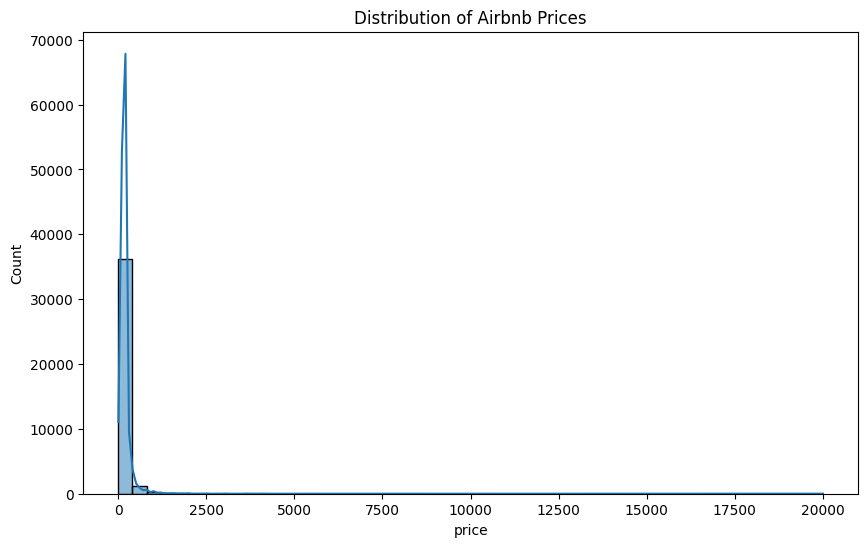

In [36]:
# Price Scoring metric:

# look at all unique prices in the airbnb dataset
airbnb_df = pd.read_csv('final_airbnb_dataset.csv')

# create a dataframe of all unique prices
unique_prices = airbnb_df['price'].unique()

# Convert the NumPy array to a pandas DataFrame
unique_prices_df = pd.DataFrame(unique_prices, columns=['price'])

# Save the DataFrame to a CSV file
unique_prices_df.to_csv('unique_prices.csv', index=False)

print(airbnb_df['price'].unique())
print(len(airbnb_df['price'].unique()))

# look at mean and std of prices
print(airbnb_df['price'].mean())
print(airbnb_df['price'].std())

# look at min and max of prices
print(airbnb_df['price'].min())
print(airbnb_df['price'].max())

# look at distribution of prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices')


In [37]:

print(140 / 190)
print(100 / 190)

print(190/(140*2))
print(190/(100*2))

# lets do a scoring metric based on mean of prices:

# airbnb_df['price_score'] = airbnb_df['price'].apply(lambda x: 1 - abs(x - airbnb_df['price'].mean()) / airbnb_df['price'].std())

price_score = 1 - abs(airbnb_df['price'] - airbnb_df['price'].mean()) / airbnb_df['price'].std()
print(price_score)

0.7368421052631579
0.5263157894736842
0.6785714285714286
0.95
0        0.813311
1        0.592535
2        0.814011
3       -1.024682
4        0.979797
           ...   
37779    0.885696
37780    0.969533
37781    0.668540
37782    0.784357
37783    0.480338
Name: price, Length: 37784, dtype: float64


In [38]:
import pandas as pd
import numpy as np

def score_price(price, p25=147.84, median=183.36, p75=293):
    """
    Scores price on a scale similar to the distance scoring (higher is better).
    
    Parameters:
    -----------
    price : float
        The price to score
    p25 : float
        25th percentile of price distribution
    median : float
        Median of price distribution 
    p75 : float
        75th percentile of price distribution
        
    Returns:
    --------
    float
        Score between 0 and 1, with higher values indicating better prices
    """
    # Use a sigmoid function centered around the median price
    # The scale parameter controls how quickly scores drop as prices increase
    scale = (p75 - p25)  # Use IQR as scale parameter
    
    # Calculate score (inverse relationship: lower prices get higher scores)
    score = 1 / (1 + np.exp((price - median) / scale))
    
    return score





In [39]:
# Example usage:
unique_prices_df['price_score'] = unique_prices_df['price'].apply(score_price)

print(unique_prices_df)

# To combine with distance score (assuming equal weights)
# df['total_score'] = 0.5 * df['distance_score'] + 0.5 * df['price_score']

# # Or with custom weights
# df['total_score'] = 0.7 * df['distance_score'] + 0.3 * df['price_score']

           price  price_score
0     139.000000     0.575809
1      78.000000     0.673887
2     139.193527     0.575484
3     750.000000     0.019771
4     185.000000     0.497176
...          ...          ...
2636  483.000000     0.112625
2637  473.000000     0.119696
2638  487.000000     0.109900
2639  548.000000     0.075022
2640   26.000000     0.747259

[2641 rows x 2 columns]


In [40]:
final_df = pd.read_csv('final_airbnb_dataset.csv')
# drop all columns except for:
    # cluster_id, price
# final_df = final_df[['cluster_id', 'price']]


# transform price to score
final_df['price_score'] = final_df['price'].apply(score_price)
# print(final_df)

# create a mapping of cluster_id to centroids_df['score']
cluster_id_to_score = centroids_df.set_index('cluster_id')['score'].to_dict()
# map the score to the final_df based on cluster_id
final_df['distance_score'] = final_df['cluster_id'].map(cluster_id_to_score)
# print(final_df)

# calculate total score
final_df['total_score'] = 0.5 * final_df['distance_score'] + 0.5 * final_df['price_score']
# print(final_df)

# create a new column called 'booked' that is the top 10% of total_score
final_df['booked'] = final_df['total_score'].apply(lambda x: 1 if x >= final_df['total_score'].quantile(0.9) else 0)
print(final_df)

# save to csv
final_df.to_csv('final_airbnb_dataset.csv', index=False)

                        id  listing_url       scrape_id  last_scraped  source  \
0                    39572        18334  20250103033441             0       0   
1                    39593        18339  20250103033441             0       0   
2                    39704        18383  20250103033441             0       1   
3                    42300        19433  20250103033441             0       0   
4                    42729        19620  20250103033441             0       0   
...                    ...          ...             ...           ...     ...   
37779  1322024128476576885         8464  20250103033441             0       0   
37780  1322305006441883773         8469  20250103033441             0       0   
37781  1322523395081457963         8471  20250103033441             0       0   
37782  1322561224337225530         8472  20250103033441             0       0   
37783  1322667742043410903         8473  20250103033441             0       0   

         host_id  host_url 